# COGS 118C Assignment 4

by Andrew Washington  
This notebook includes the graphs and programming portions of the assignment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1

# A)

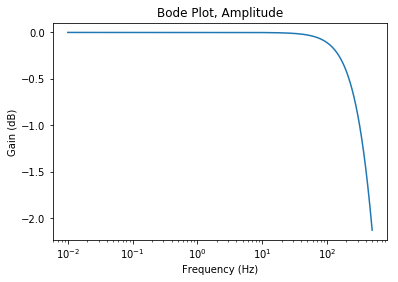

In [2]:
f = np.arange(0, 500, 0.01)
tau = 0.010 # 10 ms
H = np.power(1/(1 + np.power(f/(2*np.pi)*tau, 2)), 0.5)
Hdb = 20*np.log10(H)

plt.title('Bode Plot, Amplitude')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.semilogx(f, Hdb)

# F)

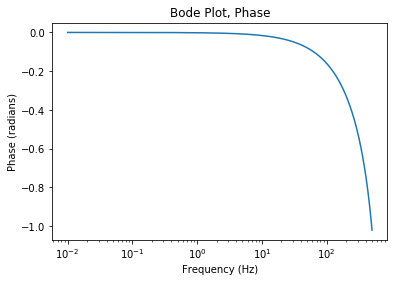

In [3]:
# Note: f defined above
phase = np.tan(-f/(2*np.pi)*tau)

plt.title('Bode Plot, Phase')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.semilogx(f, phase)

# Question 2

# A)

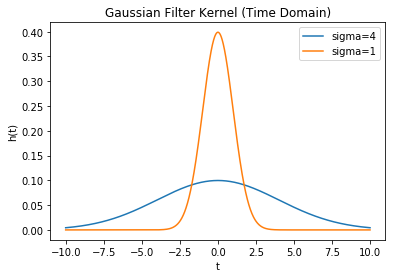

In [4]:
# Gaussian filter kernel, time domain
def h(t, sigma):
    return 1/(np.power(2*np.pi, 0.5)*sigma)*np.exp(-np.power(t, 2) / (2*np.power(sigma, 2)))

t = np.arange(-10, 10, 0.01)

#plt.figure(figsize=(15,4))
plt.plot(t, h(t, 4), label='sigma=4')
plt.plot(t, h(t, 1), label='sigma=1')
plt.title('Gaussian Filter Kernel (Time Domain)')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.legend(loc='best')

We can see that the sigma=1 curve is narrower in the time domain.

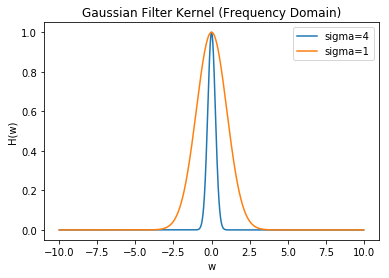

In [5]:
# Gaussian filter kernel, frequency domain
def H(w, sigma):
    return np.exp(-np.power(w*sigma, 2) / 2)

w = np.arange(-10, 10, 0.01)

#plt.figure(figsize=(15,4))
plt.plot(w, H(w, 4), label='sigma=4')
plt.plot(w, H(w, 1), label='sigma=1')
plt.title('Gaussian Filter Kernel (Frequency Domain)')
plt.xlabel('w')
plt.ylabel('H(w)')
plt.legend(loc='best')

We can see that the sigma=4 curve is narrower in the frequency domain.  This is the opposite of what was seen in the time domain.

# Question 3

# A)

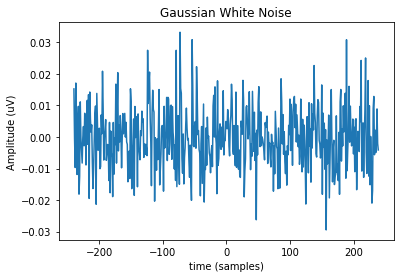

In [11]:
T = 6 # seconds
Fs = 80 # Hz
t = np.arange(-T*Fs/2, T*Fs/2)
noiseRMS = 0.01 # uV
x = np.random.normal(0, noiseRMS, len(t))
plt.plot(t, x)
plt.title('Gaussian White Noise')
plt.xlabel('time (samples)')
plt.ylabel('Amplitude (uV)')

# B)

The area under h[n] is: 1.0


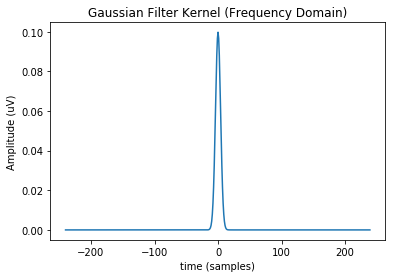

In [15]:
hn = h(t, .050*80) # Using the function defined in question 2
print('The area under h[n] is: ' + str(sum(hn)))
plt.plot(t, hn)
plt.title('Gaussian Filter Kernel (Frequency Domain)')
plt.xlabel('time (samples)')
plt.ylabel('Amplitude (uV)')

# C)

In [16]:
# Using convolution theorem to calculate x[n] convolved with h[n].
# We must use np.real() because np.fft() returns complex numbers 
#     even though the imaginary part is zero (or very close).
y = np.real(np.fft.ifft(np.multiply(np.fft.fft(x), np.fft.fft(hn))))

# D)

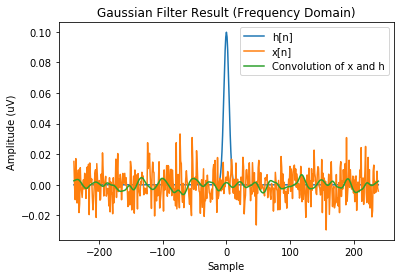

In [17]:
plt.plot(t, hn, label='h[n]')
plt.plot(t, x, label='x[n]')
plt.plot(t, y, label='Convolution of x and h')
plt.title('Gaussian Filter Result (Frequency Domain)')
plt.xlabel('Sample')
plt.ylabel('Amplitude (uV)')
plt.legend(loc='best')

# E)

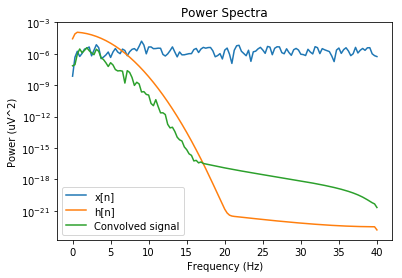

In [19]:
import scipy as sp
from scipy import signal
fx, psdx = sp.signal.welch(x, Fs)
fhn, psdhn = sp.signal.welch(hn, Fs)
fy, psdy = sp.signal.welch(y, Fs)
plt.semilogy(fx, psdx, label='x[n]')
plt.semilogy(fhn, psdhn, label='h[n]')
plt.semilogy(fy, psdy, label='Convolved signal')
plt.title('Power Spectra')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (uV^2)')
plt.legend(loc='best')